In [6]:
import os
import pandas as pd

# Define input folders
folder1 = "C:/Users/thaplood2/Documents/Story_Math_analysis/commonHCP262_172_JC_threshold_fisher_transformation_pearson_math_predefined/"
folder2 = "C:/Users/thaplood2/Documents/Story_Math_analysis/commonHCP262_172_JC_threshold_fisher_transformation_pearson_story/"
output_folder = "C:/Users/thaplood2/Documents/Story_Math_analysis/common"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get subject file names from both folders
subjects1 = {f.split('_')[0]: f for f in os.listdir(folder1) if f.endswith('.xlsx')}
subjects2 = {f.split('_')[0]: f for f in os.listdir(folder2) if f.endswith('.xlsx')}

# Find common subjects in both folders
common_subjects = set(subjects1.keys()) & set(subjects2.keys())

print("Common subjects found:", common_subjects)

for subject in common_subjects:
    print(f"Processing subject: {subject}")
    
    # Get the paths for each subject's file in both folders
    file1 = os.path.join(folder1, subjects1[subject])
    file2 = os.path.join(folder2, subjects2[subject])
    
    print(f"Processing files: {file1} and {file2}")

    # Define hemisphere and interhemispheric sheet names
    hemispheres = ["LH", "RH"]
    inter = "inter"
    
    # Initialize dictionary to store results for each subject
    common_data = {}
    connection_names = {}

    for hemi in hemispheres:
        # Define sheet names for math and story
        sig_sheet = f"sigConn_{hemi}"
        fc_sheet = f"{hemi}_fc"
        
        # Check if the required sheet exists in both files
        try:
            if fc_sheet not in pd.ExcelFile(file1).sheet_names:
                raise ValueError(f"Sheet {fc_sheet} not found in {file1}")
            if fc_sheet not in pd.ExcelFile(file2).sheet_names:
                raise ValueError(f"Sheet {fc_sheet} not found in {file2}")
            
            # Load the FC sheets for both math and story
            fc1 = pd.read_excel(file1, sheet_name=fc_sheet)
            fc2 = pd.read_excel(file2, sheet_name=fc_sheet)
            
            # Select the first 104 columns (time points) if available, otherwise use all available time points
            num_time_points = min(104, fc1.shape[1])  # Get the minimum between 104 and the available columns (time points)
            fc1 = fc1.iloc[:, 1:num_time_points+1]  # Skip the first column (index) and select columns for time points
            fc2 = fc2.iloc[:, 1:num_time_points+1]  # Skip the first column (index) and select columns for time points
            
            # Store the math and story FC values for each hemisphere
            common_data[f"{hemi}_fc_math"] = fc1
            common_data[f"{hemi}_fc_story"] = fc2
            
            # Load the connection names (ROI pairs) from the sigConn sheet
            df_sig = pd.read_excel(file1, sheet_name=sig_sheet, usecols=[1, 2])  # ROI1, ROI2
            connection_names[f"{hemi}_conn"] = df_sig  # Store the ROI pairs as connections
        
        except Exception as e:
            print(f"Error processing {hemi} sheets for subject {subject}: {e}")
            raise  # Stop the script on error
    
    # Process interhemispheric connections (inter)
    try:
        sig_sheet_inter = "sigConn_inter_"
        fc_sheet_inter = "inter_fc_"
        
        # Check if the interhemispheric sheet exists
        if fc_sheet_inter not in pd.ExcelFile(file1).sheet_names:
            raise ValueError(f"Sheet {fc_sheet_inter} not found in {file1}")
        if fc_sheet_inter not in pd.ExcelFile(file2).sheet_names:
            raise ValueError(f"Sheet {fc_sheet_inter} not found in {file2}")
        
        # Load the interhemispheric FC sheets for both math and story
        fc1_inter = pd.read_excel(file1, sheet_name=fc_sheet_inter)
        fc2_inter = pd.read_excel(file2, sheet_name=fc_sheet_inter)
        
        # Select the first 104 columns (time points) if available, otherwise use all available time points
        num_time_points_inter = min(104, fc1_inter.shape[1])  # Get the minimum between 104 and the available columns (time points)
        fc1_inter = fc1_inter.iloc[:, 1:num_time_points_inter+1]  # Skip the first column (index) and select columns for time points
        fc2_inter = fc2_inter.iloc[:, 1:num_time_points_inter+1]  # Skip the first column (index) and select columns for time points
        
        # Store the interhemispheric FC values for both math and story
        common_data["inter_fc_math"] = fc1_inter
        common_data["inter_fc_story"] = fc2_inter
        
        # Load the connection names (ROI pairs) for interhemispheric connections
        df_sig_inter = pd.read_excel(file1, sheet_name=sig_sheet_inter, usecols=[1, 2])  # ROI1, ROI2
        connection_names["inter_conn"] = df_sig_inter  # Store the ROI pairs as interhemispheric connections
    
    except Exception as e:
        print(f"Error processing interhemispheric sheets for subject {subject}: {e}")
        raise  # Stop the script on error
    
    # Save results to an Excel file for the subject
    try:
        output_file = os.path.join(output_folder, f"{subject}_common_connections.xlsx")
        with pd.ExcelWriter(output_file) as writer:
            # Write FC data for each hemisphere and interhemispheric
            for sheet_name, df in common_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)
            
            # Write connection names for each hemisphere and interhemispheric
            for sheet_name, df in connection_names.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        print(f"Results saved for subject: {subject}")
    
    except Exception as e:
        print(f"Error saving results for subject {subject}: {e}")
        raise  # Stop the script on error

print("All subjects processed!")


Common subjects found: {'161832', '300618', '144125', '173738', '188347', '135629', '481951', '217126', '841349', '548250', '194645', '627852', '647858', '220721', '219231', '694362', '993675', '151324', '635245', '211821', '459453', '587664', '202113', '268749', '541640', '176037', '919966', '159340', '154936', '175742', '198855', '115724', '176845', '599065', '333330', '209127', '211316', '559457', '121416', '120717', '147636', '456346', '204420', '188448', '633847', '213421', '275645', '102614', '208125', '125222', '305830', '180230', '424939', '454140', '206323', '561444', '814548', '942658', '115825', '199352', '870861', '204622', '656253', '346137', '237334', '117930', '350330', '421226', '156536', '513736', '856968', '186141', '124624', '191942', '882161', '118124', '200513', '908860', '129129', '774663', '149842', '156031', '432332', '160830', '151829', '558960', '481042', '114621', '576255', '178243', '290136', '135730', '843151', '615744', '645450', '634748', '657659', '15794

In [4]:
import os
import pandas as pd

# Define input folders
folder1 = "C:/Users/thaplood2/Documents/Story_Math_analysis/commonHCP262_172_JC_threshold_fisher_transformation_pearson_math_predefined/"
folder2 = "C:/Users/thaplood2/Documents/Story_Math_analysis/commonHCP262_172_JC_threshold_fisher_transformation_pearson_story/"
output_folder = "C:/Users/thaplood2/Documents/Story_Math_analysis/common"

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get subject file names from both folders
subjects1 = {f.split('_')[0]: f for f in os.listdir(folder1) if f.endswith('.xlsx')}
subjects2 = {f.split('_')[0]: f for f in os.listdir(folder2) if f.endswith('.xlsx')}

# Find common subjects in both folders
common_subjects = set(subjects1.keys()) & set(subjects2.keys())

print("Common subjects found:", common_subjects)

for subject in common_subjects:
    print(f"Processing subject: {subject}")
    
    # Get the paths for each subject's file in both folders
    file1 = os.path.join(folder1, subjects1[subject])
    file2 = os.path.join(folder2, subjects2[subject])
    
    print(f"Processing files: {file1} and {file2}")

    # Define hemisphere and interhemispheric sheet names
    hemispheres = ["LH", "RH"]
    inter = "inter"
    
    # Initialize dictionary to store results for each subject
    common_data = {}
    connection_names = {}

    for hemi in hemispheres:
        # Define sheet names for math and story
        sig_sheet = f"sigConn_{hemi}"
        fc_sheet = f"{hemi}_fc"
        
        # Check if the required sheet exists in both files
        try:
            if fc_sheet not in pd.ExcelFile(file1).sheet_names:
                raise ValueError(f"Sheet {fc_sheet} not found in {file1}")
            if fc_sheet not in pd.ExcelFile(file2).sheet_names:
                raise ValueError(f"Sheet {fc_sheet} not found in {file2}")
            
            # Load the FC sheets for both math and story
            fc1 = pd.read_excel(file1, sheet_name=fc_sheet)
            fc2 = pd.read_excel(file2, sheet_name=fc_sheet)
            
            # Select the first 104 columns (time points) if available, otherwise use all available time points
            num_time_points = min(104, fc1.shape[1])  # Get the minimum between 104 and the available columns (time points)
            fc1 = fc1.iloc[:, 1:num_time_points+1]  # Skip the first column (index) and select columns for time points
            fc2 = fc2.iloc[:, 1:num_time_points+1]  # Skip the first column (index) and select columns for time points
            
            # Store the math and story FC values for each hemisphere
            common_data[f"{hemi}_fc_math"] = fc1
            common_data[f"{hemi}_fc_story"] = fc2
            
            # Load the connection names (ROI pairs) from the sigConn sheet
            df_sig = pd.read_excel(file1, sheet_name=sig_sheet, usecols=[1, 2])  # ROI1, ROI2
            connection_names[f"{hemi}_conn"] = df_sig  # Store the ROI pairs as connections
        
        except Exception as e:
            print(f"Error processing {hemi} sheets for subject {subject}: {e}")
            raise  # Stop the script on error
    
    # Process interhemispheric connections (inter)
    try:
        sig_sheet_inter = "sigConn_inter"
        fc_sheet_inter = "inter_fc"
        
        # Check if the interhemispheric sheet exists
        if fc_sheet_inter not in pd.ExcelFile(file1).sheet_names:
            raise ValueError(f"Sheet {fc_sheet_inter} not found in {file1}")
        if fc_sheet_inter not in pd.ExcelFile(file2).sheet_names:
            raise ValueError(f"Sheet {fc_sheet_inter} not found in {file2}")
        
        # Load the interhemispheric FC sheets for both math and story
        fc1_inter = pd.read_excel(file1, sheet_name=fc_sheet_inter)
        fc2_inter = pd.read_excel(file2, sheet_name=fc_sheet_inter)
        
        # Select the first 104 columns (time points) if available, otherwise use all available time points
        num_time_points_inter = min(104, fc1_inter.shape[1])  # Get the minimum between 104 and the available columns (time points)
        fc1_inter = fc1_inter.iloc[:, 1:num_time_points_inter+1]  # Skip the first column (index) and select columns for time points
        fc2_inter = fc2_inter.iloc[:, 1:num_time_points_inter+1]  # Skip the first column (index) and select columns for time points
        
        # Store the interhemispheric FC values for both math and story
        common_data["inter_fc_math"] = fc1_inter
        common_data["inter_fc_story"] = fc2_inter
        
        # Load the connection names (ROI pairs) for interhemispheric connections
        df_sig_inter = pd.read_excel(file1, sheet_name=sig_sheet_inter, usecols=[1, 2])  # ROI1, ROI2
        connection_names["inter_conn"] = df_sig_inter  # Store the ROI pairs as interhemispheric connections
    
    except Exception as e:
        print(f"Error processing interhemispheric sheets for subject {subject}: {e}")
        raise  # Stop the script on error
    
    # Save results to an Excel file for the subject
    try:
        output_file = os.path.join(output_folder, f"{subject}_common_connections.xlsx")
        with pd.ExcelWriter(output_file) as writer:
            # Write FC data for each hemisphere and interhemispheric
            for sheet_name, df in common_data.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)
            
            # Write connection names for each hemisphere and interhemispheric
            for sheet_name, df in connection_names.items():
                df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        print(f"Results saved for subject: {subject}")
    
    except Exception as e:
        print(f"Error saving results for subject {subject}: {e}")
        raise  # Stop the script on error

print("All subjects processed!")


Common subjects found: {'161832', '300618', '144125', '173738', '188347', '135629', '481951', '217126', '841349', '548250', '194645', '627852', '647858', '220721', '219231', '694362', '993675', '151324', '635245', '211821', '459453', '587664', '202113', '268749', '541640', '176037', '919966', '159340', '154936', '175742', '198855', '115724', '176845', '599065', '333330', '209127', '211316', '559457', '121416', '120717', '147636', '456346', '204420', '188448', '633847', '213421', '275645', '102614', '208125', '125222', '305830', '180230', '424939', '454140', '206323', '561444', '814548', '942658', '115825', '199352', '870861', '204622', '656253', '346137', '237334', '117930', '350330', '421226', '156536', '513736', '856968', '186141', '124624', '191942', '882161', '118124', '200513', '908860', '129129', '774663', '149842', '156031', '432332', '160830', '151829', '558960', '481042', '114621', '576255', '178243', '290136', '135730', '843151', '615744', '645450', '634748', '657659', '15794

KeyboardInterrupt: 

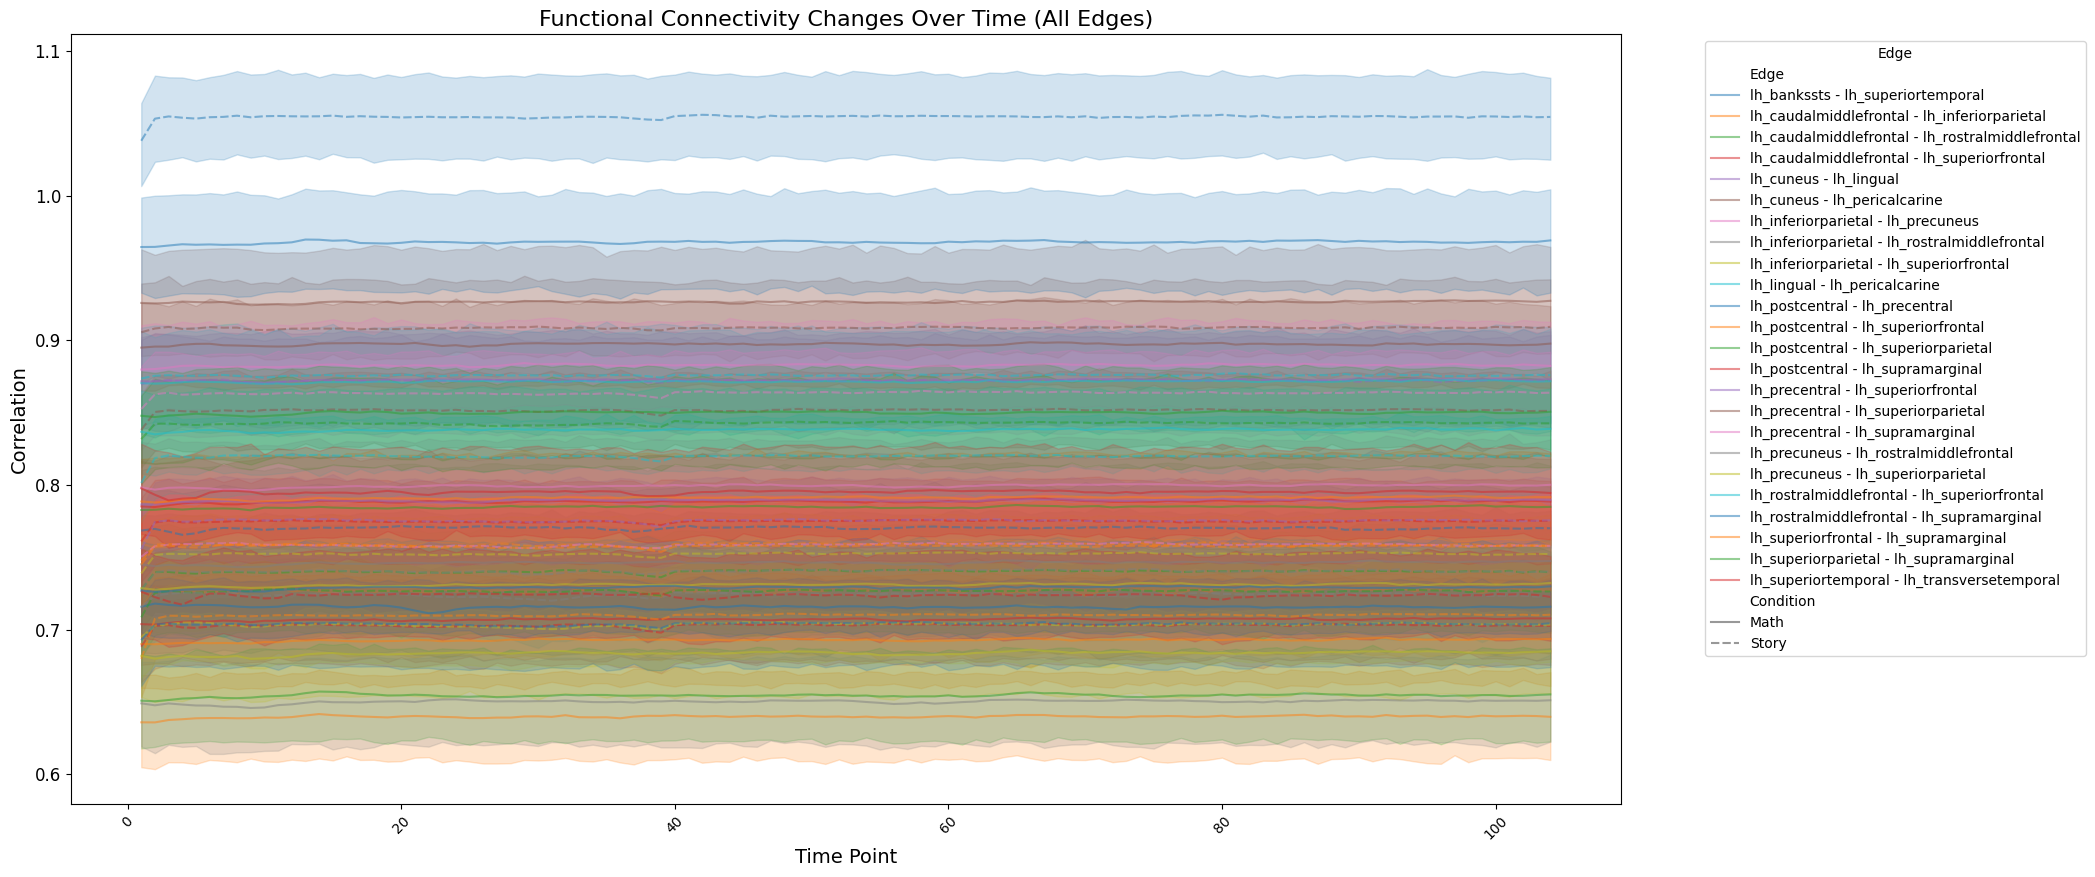

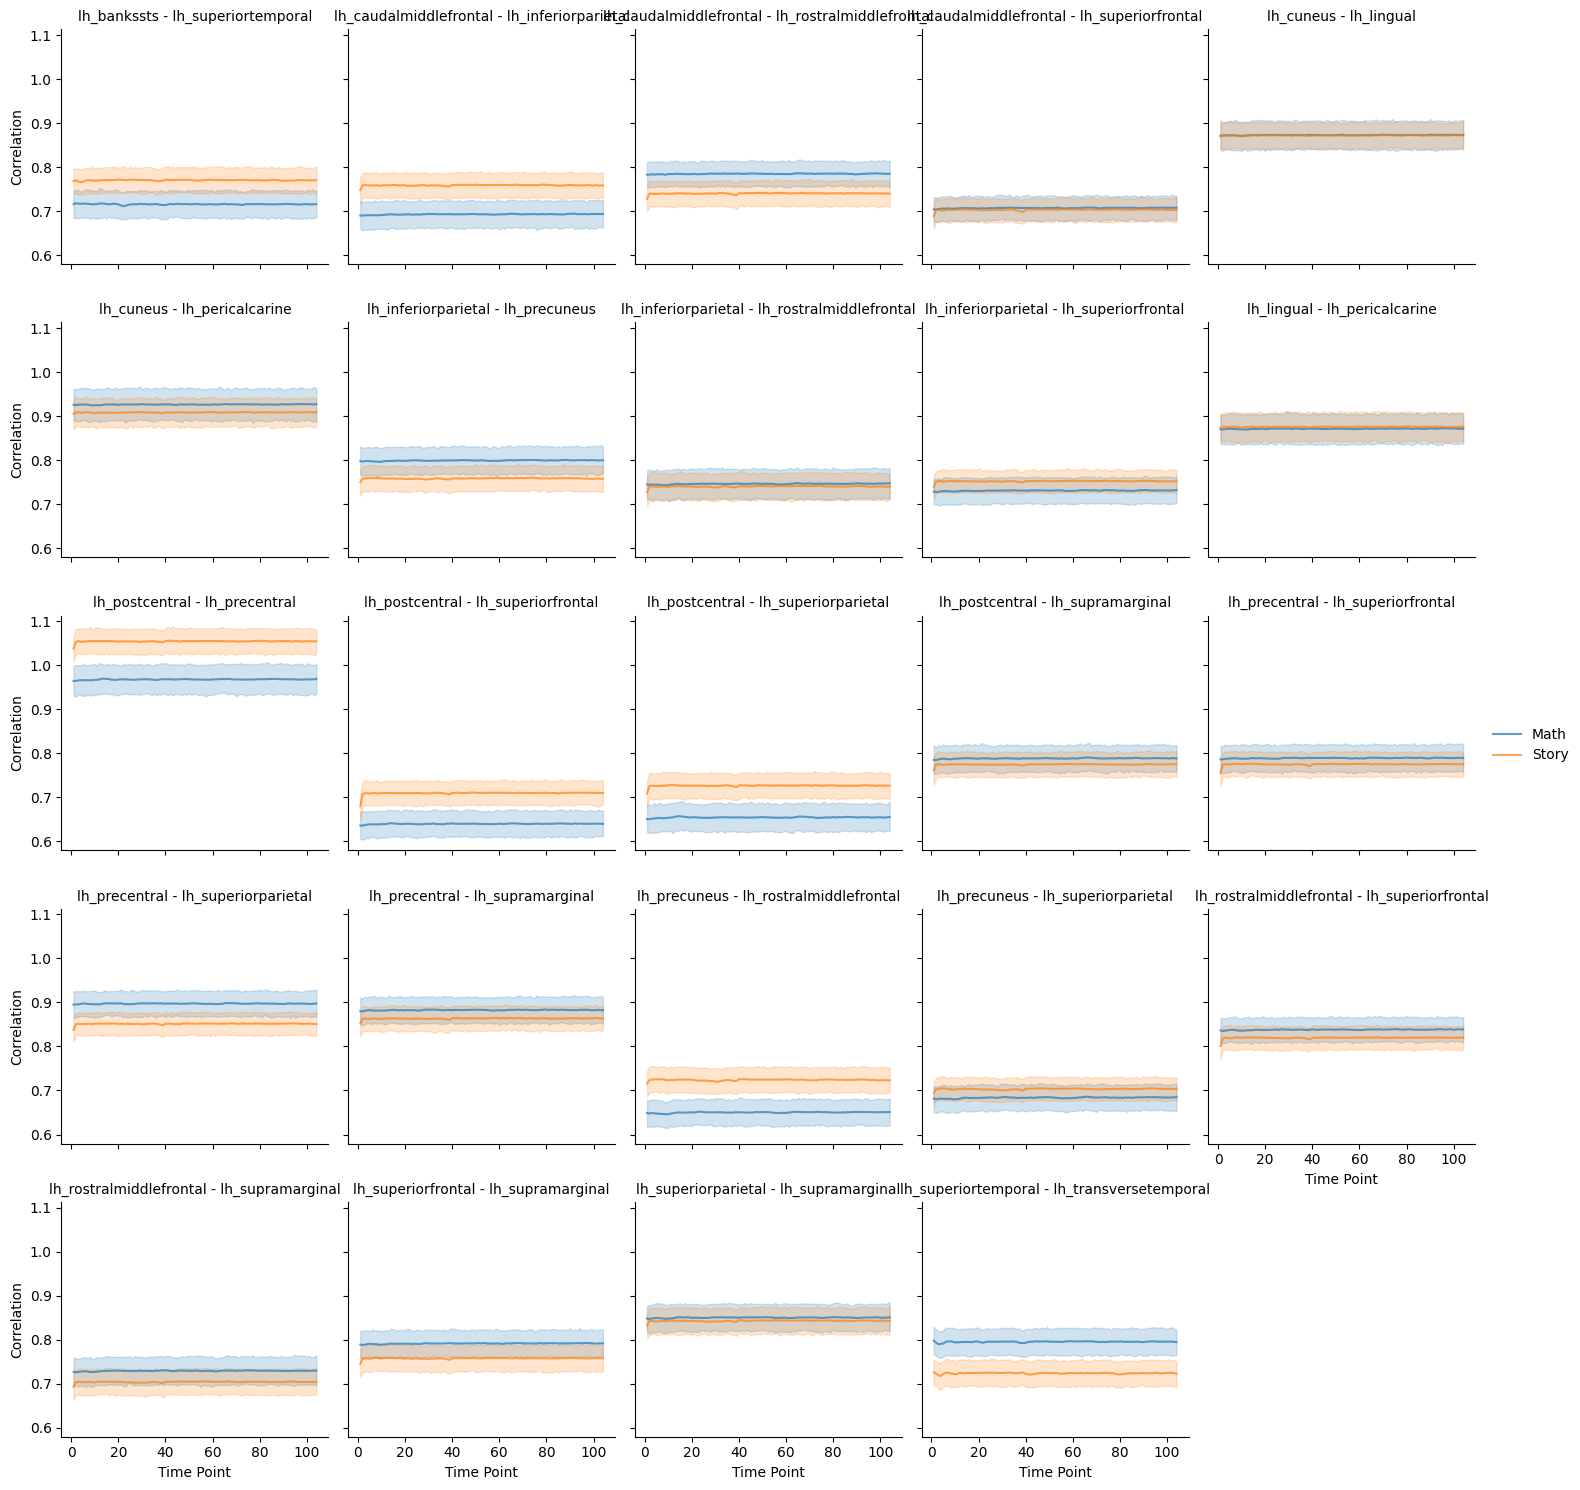

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory containing subject Excel files
directory = "C:/Users/thaplood2/Documents/Story_Math_analysis/common/"  # Replace with actual path

# Initialize an empty DataFrame to collect data from all subjects
all_data = pd.DataFrame()

# Process each subject's file
for file_name in os.listdir(directory):
    if file_name.endswith(".xlsx"):  # Process only Excel files
        file_path = os.path.join(directory, file_name)
        xls = pd.ExcelFile(file_path)

        # Read relevant sheets
        lh_math = pd.read_excel(xls, sheet_name='LH_fc_math', header=None)
        lh_story = pd.read_excel(xls, sheet_name='LH_fc_story', header=None)
        lh_conn = pd.read_excel(xls, sheet_name='LH_conn', header=None)

        # Extract edge names (excluding header)
        edges = lh_conn.iloc[1:, 0].astype(str) + " - " + lh_conn.iloc[1:, 1].astype(str)  # Combine columns A & B

        # Extract time points (first row of data sheets)
        time_points = lh_math.iloc[0, :].values  # Use first row as time points

        # Convert data into long format for visualization
        def reshape_data(df, condition):
            df_data = df.iloc[1:].copy()  # Exclude first row (time points)
            df_data.columns = time_points  # Assign time points as column names
            df_data['Edge'] = edges.values  # Assign edge names
            df_long = df_data.melt(id_vars=['Edge'], var_name='Time Point', value_name='Correlation')
            df_long['Condition'] = condition
            df_long['Subject'] = file_name  # Add subject identifier
            return df_long

        math_data = reshape_data(lh_math, 'Math')
        story_data = reshape_data(lh_story, 'Story')

        # Append data for all subjects
        all_data = pd.concat([all_data, math_data, story_data], ignore_index=True)

# Convert Time Point column to numeric for proper plotting
all_data['Time Point'] = pd.to_numeric(all_data['Time Point'])

### OPTION 1: Single Line Plot for All Edges ###
plt.figure(figsize=(20, 10))
sns.lineplot(data=all_data, x='Time Point', y='Correlation', hue='Edge', 
             style='Condition', palette='tab10', alpha=0.5)

plt.xlabel("Time Point", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.title("Functional Connectivity Changes Over Time (All Edges)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title="Edge", bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()


### OPTION 2: Facet Grid - One Small Plot Per Edge ###
g = sns.FacetGrid(all_data, col="Edge", col_wrap=5, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="Time Point", y="Correlation", hue="Condition", alpha=0.7)
g.set_axis_labels("Time Point", "Correlation")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


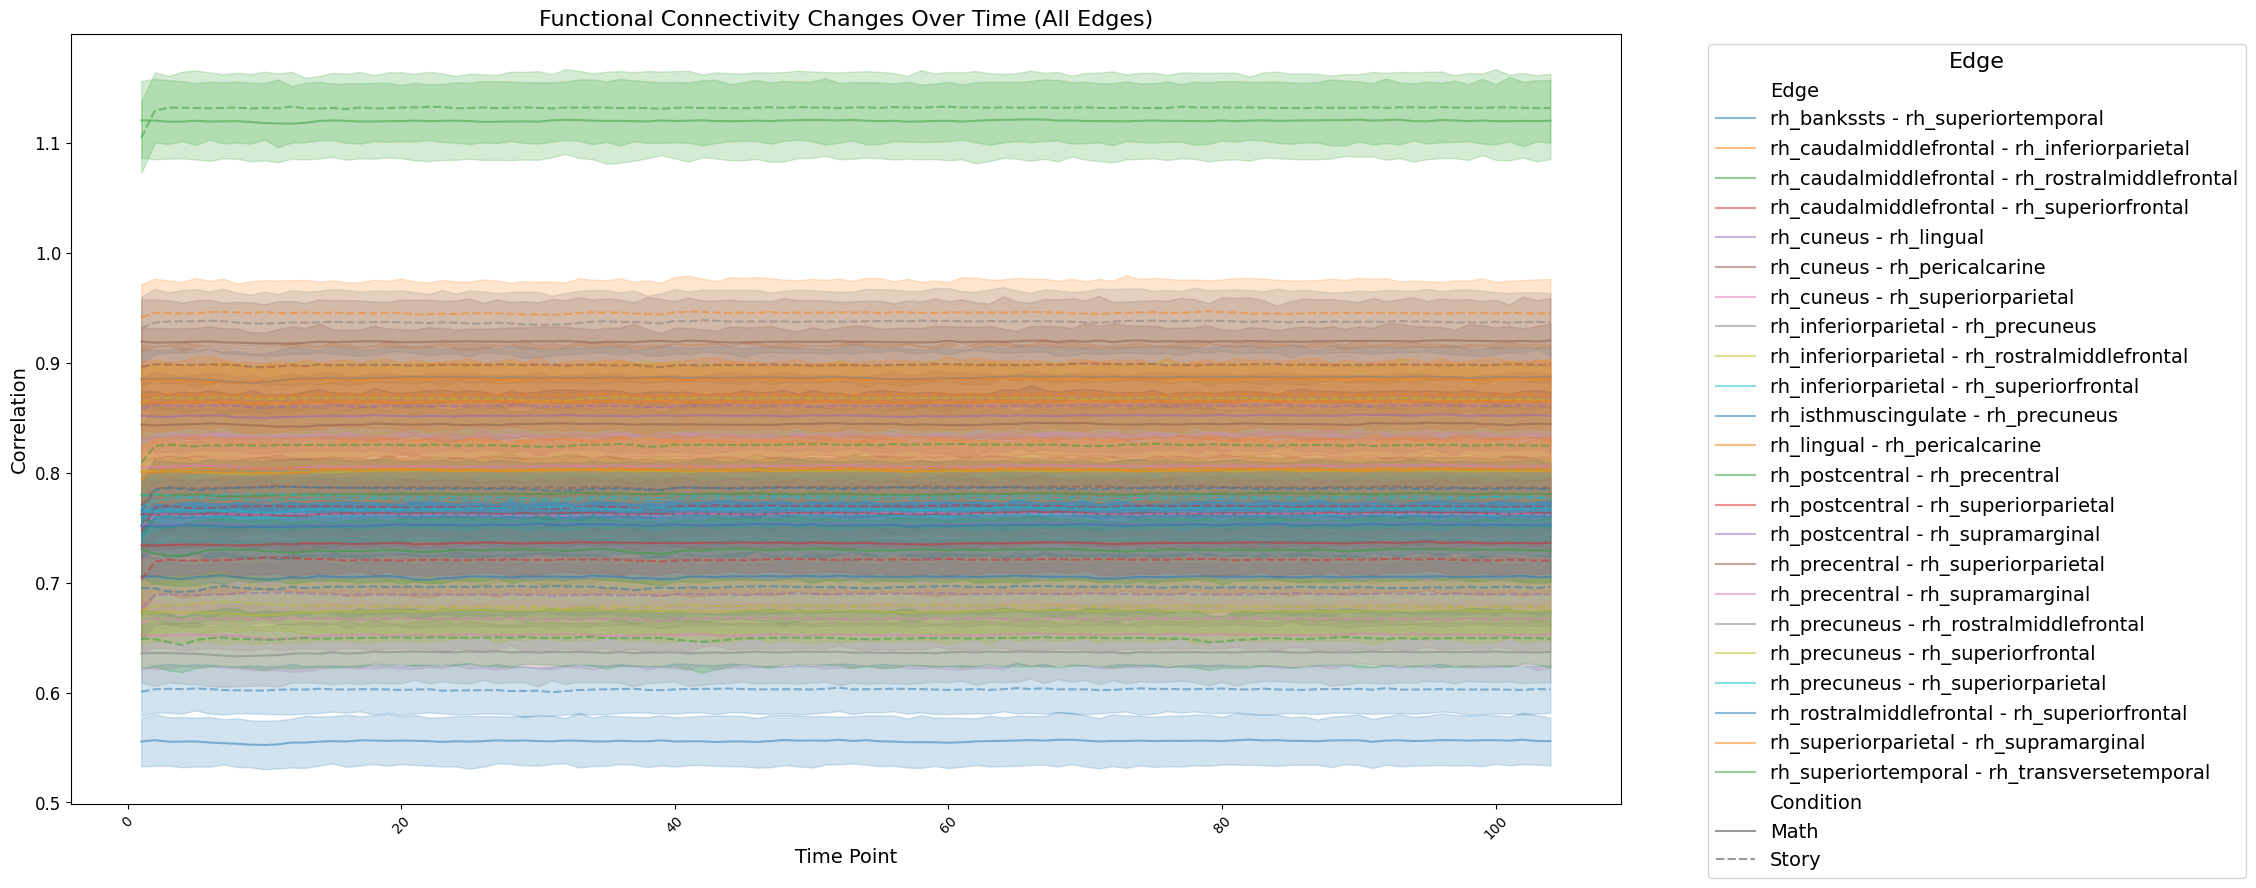

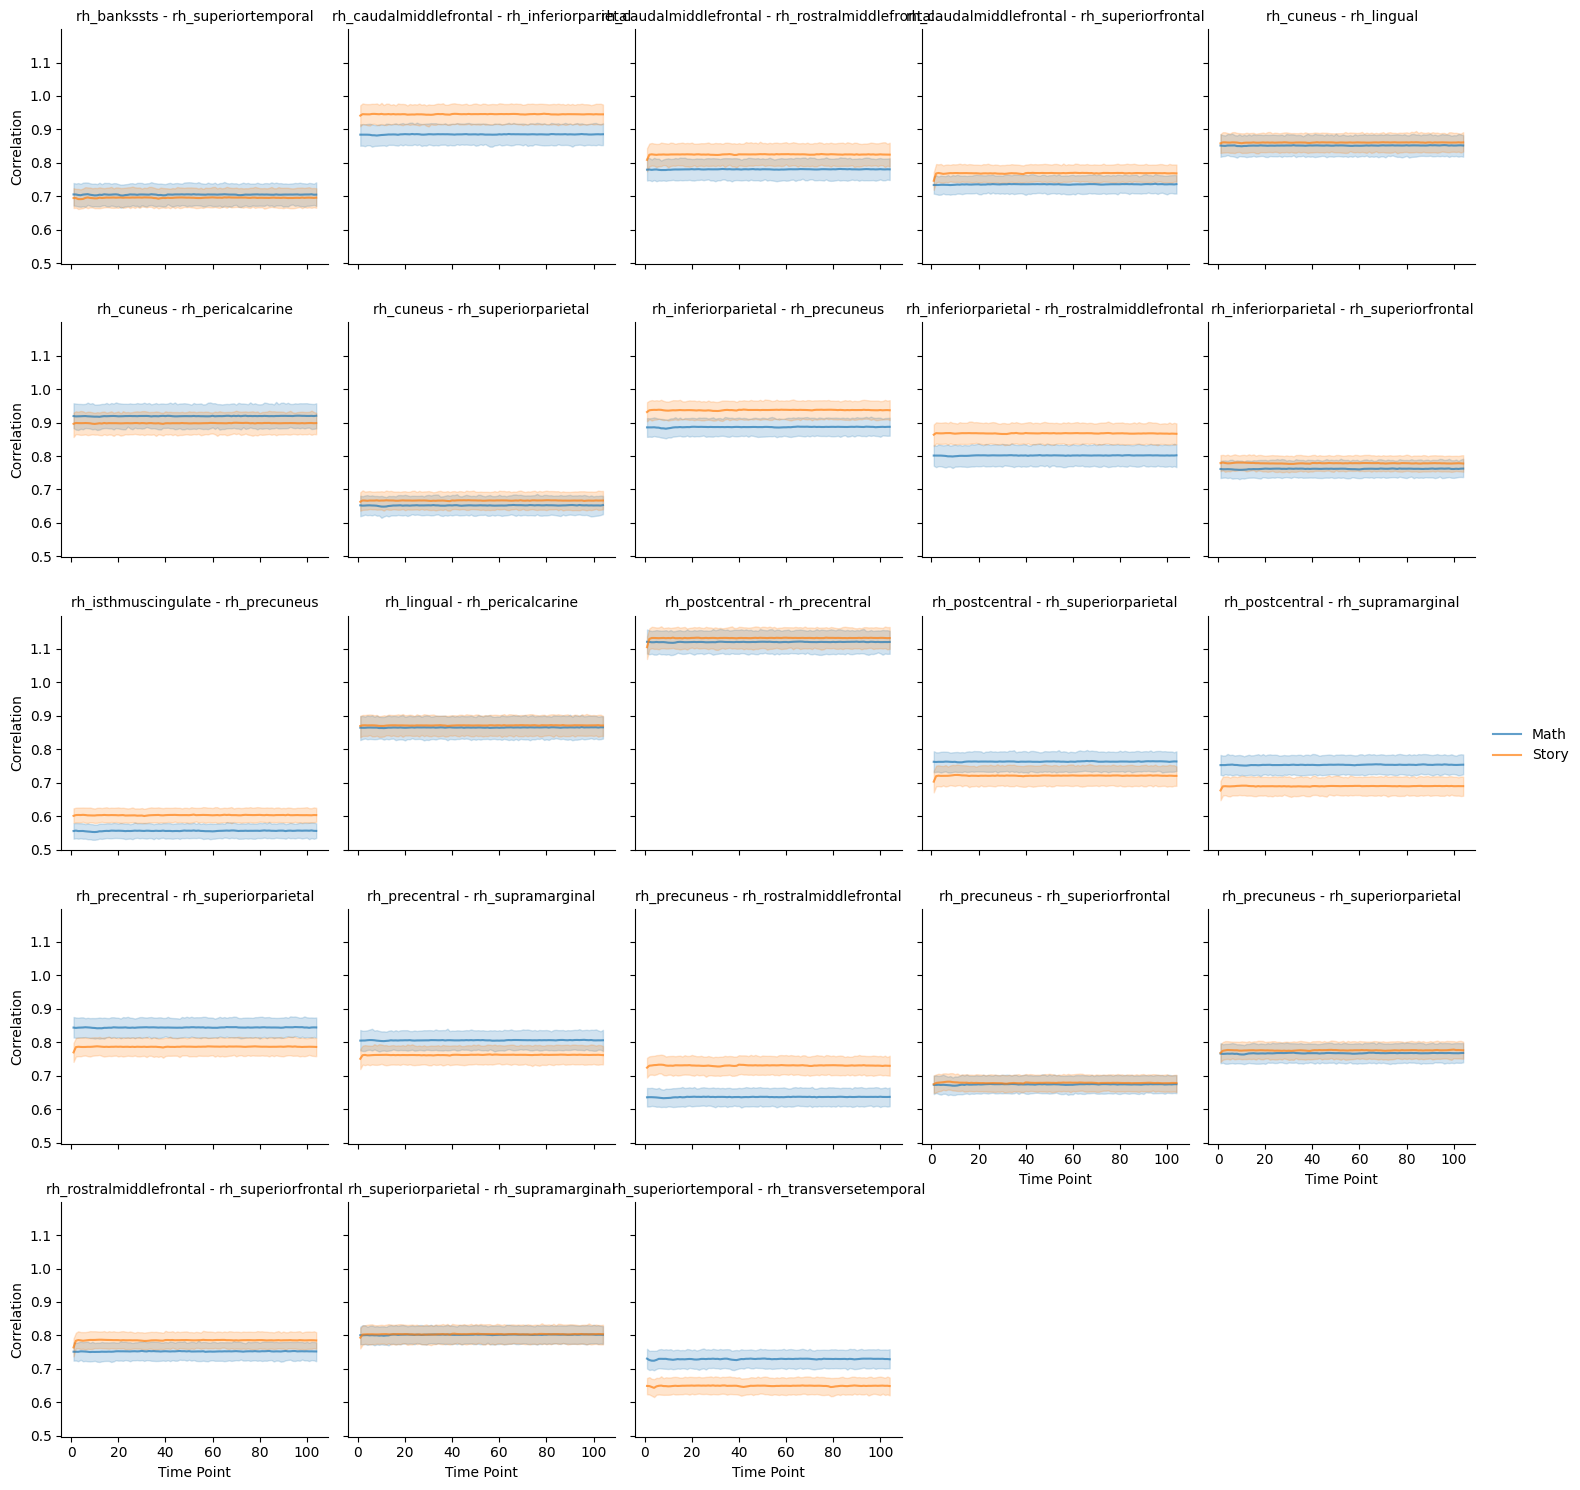

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory containing subject Excel files
directory = "C:/Users/thaplood2/Documents/Story_Math_analysis/common/"  # Replace with actual path

# Initialize an empty DataFrame to collect data from all subjects
all_data = pd.DataFrame()

# Process each subject's file
for file_name in os.listdir(directory):
    if file_name.endswith(".xlsx"):  # Process only Excel files
        file_path = os.path.join(directory, file_name)
        xls = pd.ExcelFile(file_path)

        # Read relevant sheets
        lh_math = pd.read_excel(xls, sheet_name='RH_fc_math', header=None)
        lh_story = pd.read_excel(xls, sheet_name='RH_fc_story', header=None)
        lh_conn = pd.read_excel(xls, sheet_name='RH_conn', header=None)

        # Extract edge names (excluding header)
        edges = lh_conn.iloc[1:, 0].astype(str) + " - " + lh_conn.iloc[1:, 1].astype(str)  # Combine columns A & B

        # Extract time points (first row of data sheets)
        time_points = lh_math.iloc[0, :].values  # Use first row as time points

        # Convert data into long format for visualization
        def reshape_data(df, condition):
            df_data = df.iloc[1:].copy()  # Exclude first row (time points)
            df_data.columns = time_points  # Assign time points as column names
            df_data['Edge'] = edges.values  # Assign edge names
            df_long = df_data.melt(id_vars=['Edge'], var_name='Time Point', value_name='Correlation')
            df_long['Condition'] = condition
            df_long['Subject'] = file_name  # Add subject identifier
            return df_long

        math_data = reshape_data(lh_math, 'Math')
        story_data = reshape_data(lh_story, 'Story')

        # Append data for all subjects
        all_data = pd.concat([all_data, math_data, story_data], ignore_index=True)

# Convert Time Point column to numeric for proper plotting
all_data['Time Point'] = pd.to_numeric(all_data['Time Point'])

### OPTION 1: Single Line Plot for All Edges ###
plt.figure(figsize=(20, 10))
sns.lineplot(data=all_data, x='Time Point', y='Correlation', hue='Edge', 
             style='Condition', palette='tab10', alpha=0.5)

plt.xlabel("Time Point", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.title("Functional Connectivity Changes Over Time (All Edges)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title="Edge", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1))  # Place legend outside the plot
plt.show()


### OPTION 2: Facet Grid - One Small Plot Per Edge ###
g = sns.FacetGrid(all_data, col="Edge", col_wrap=5, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="Time Point", y="Correlation", hue="Condition", alpha=0.7)
g.set_axis_labels("Time Point", "Correlation")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


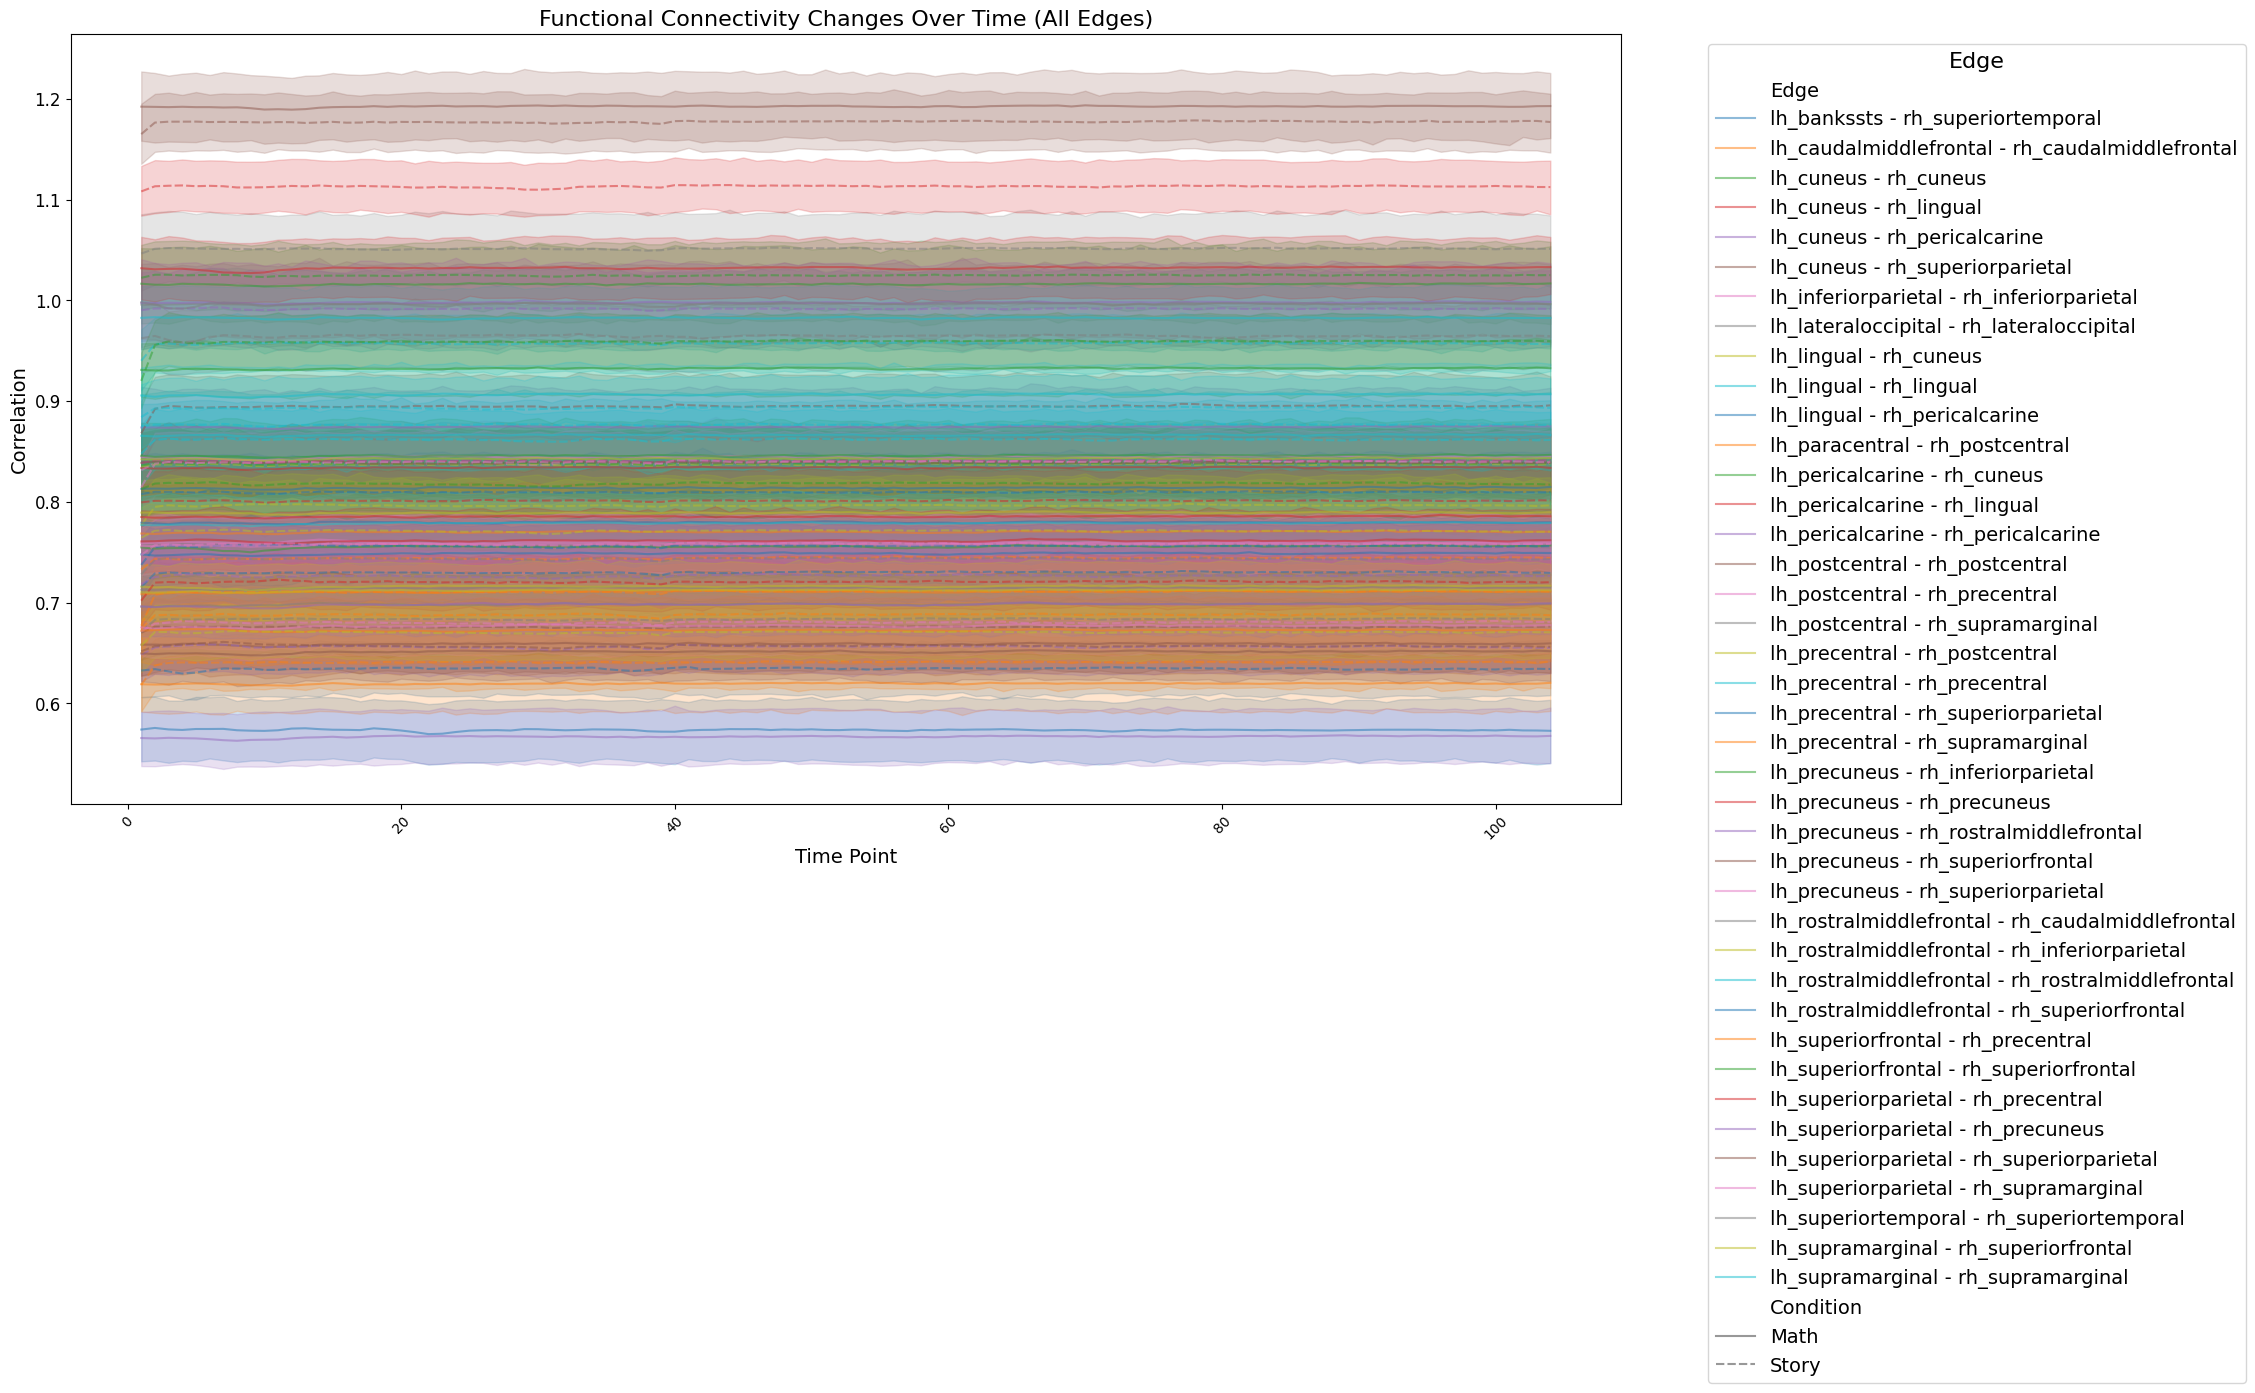

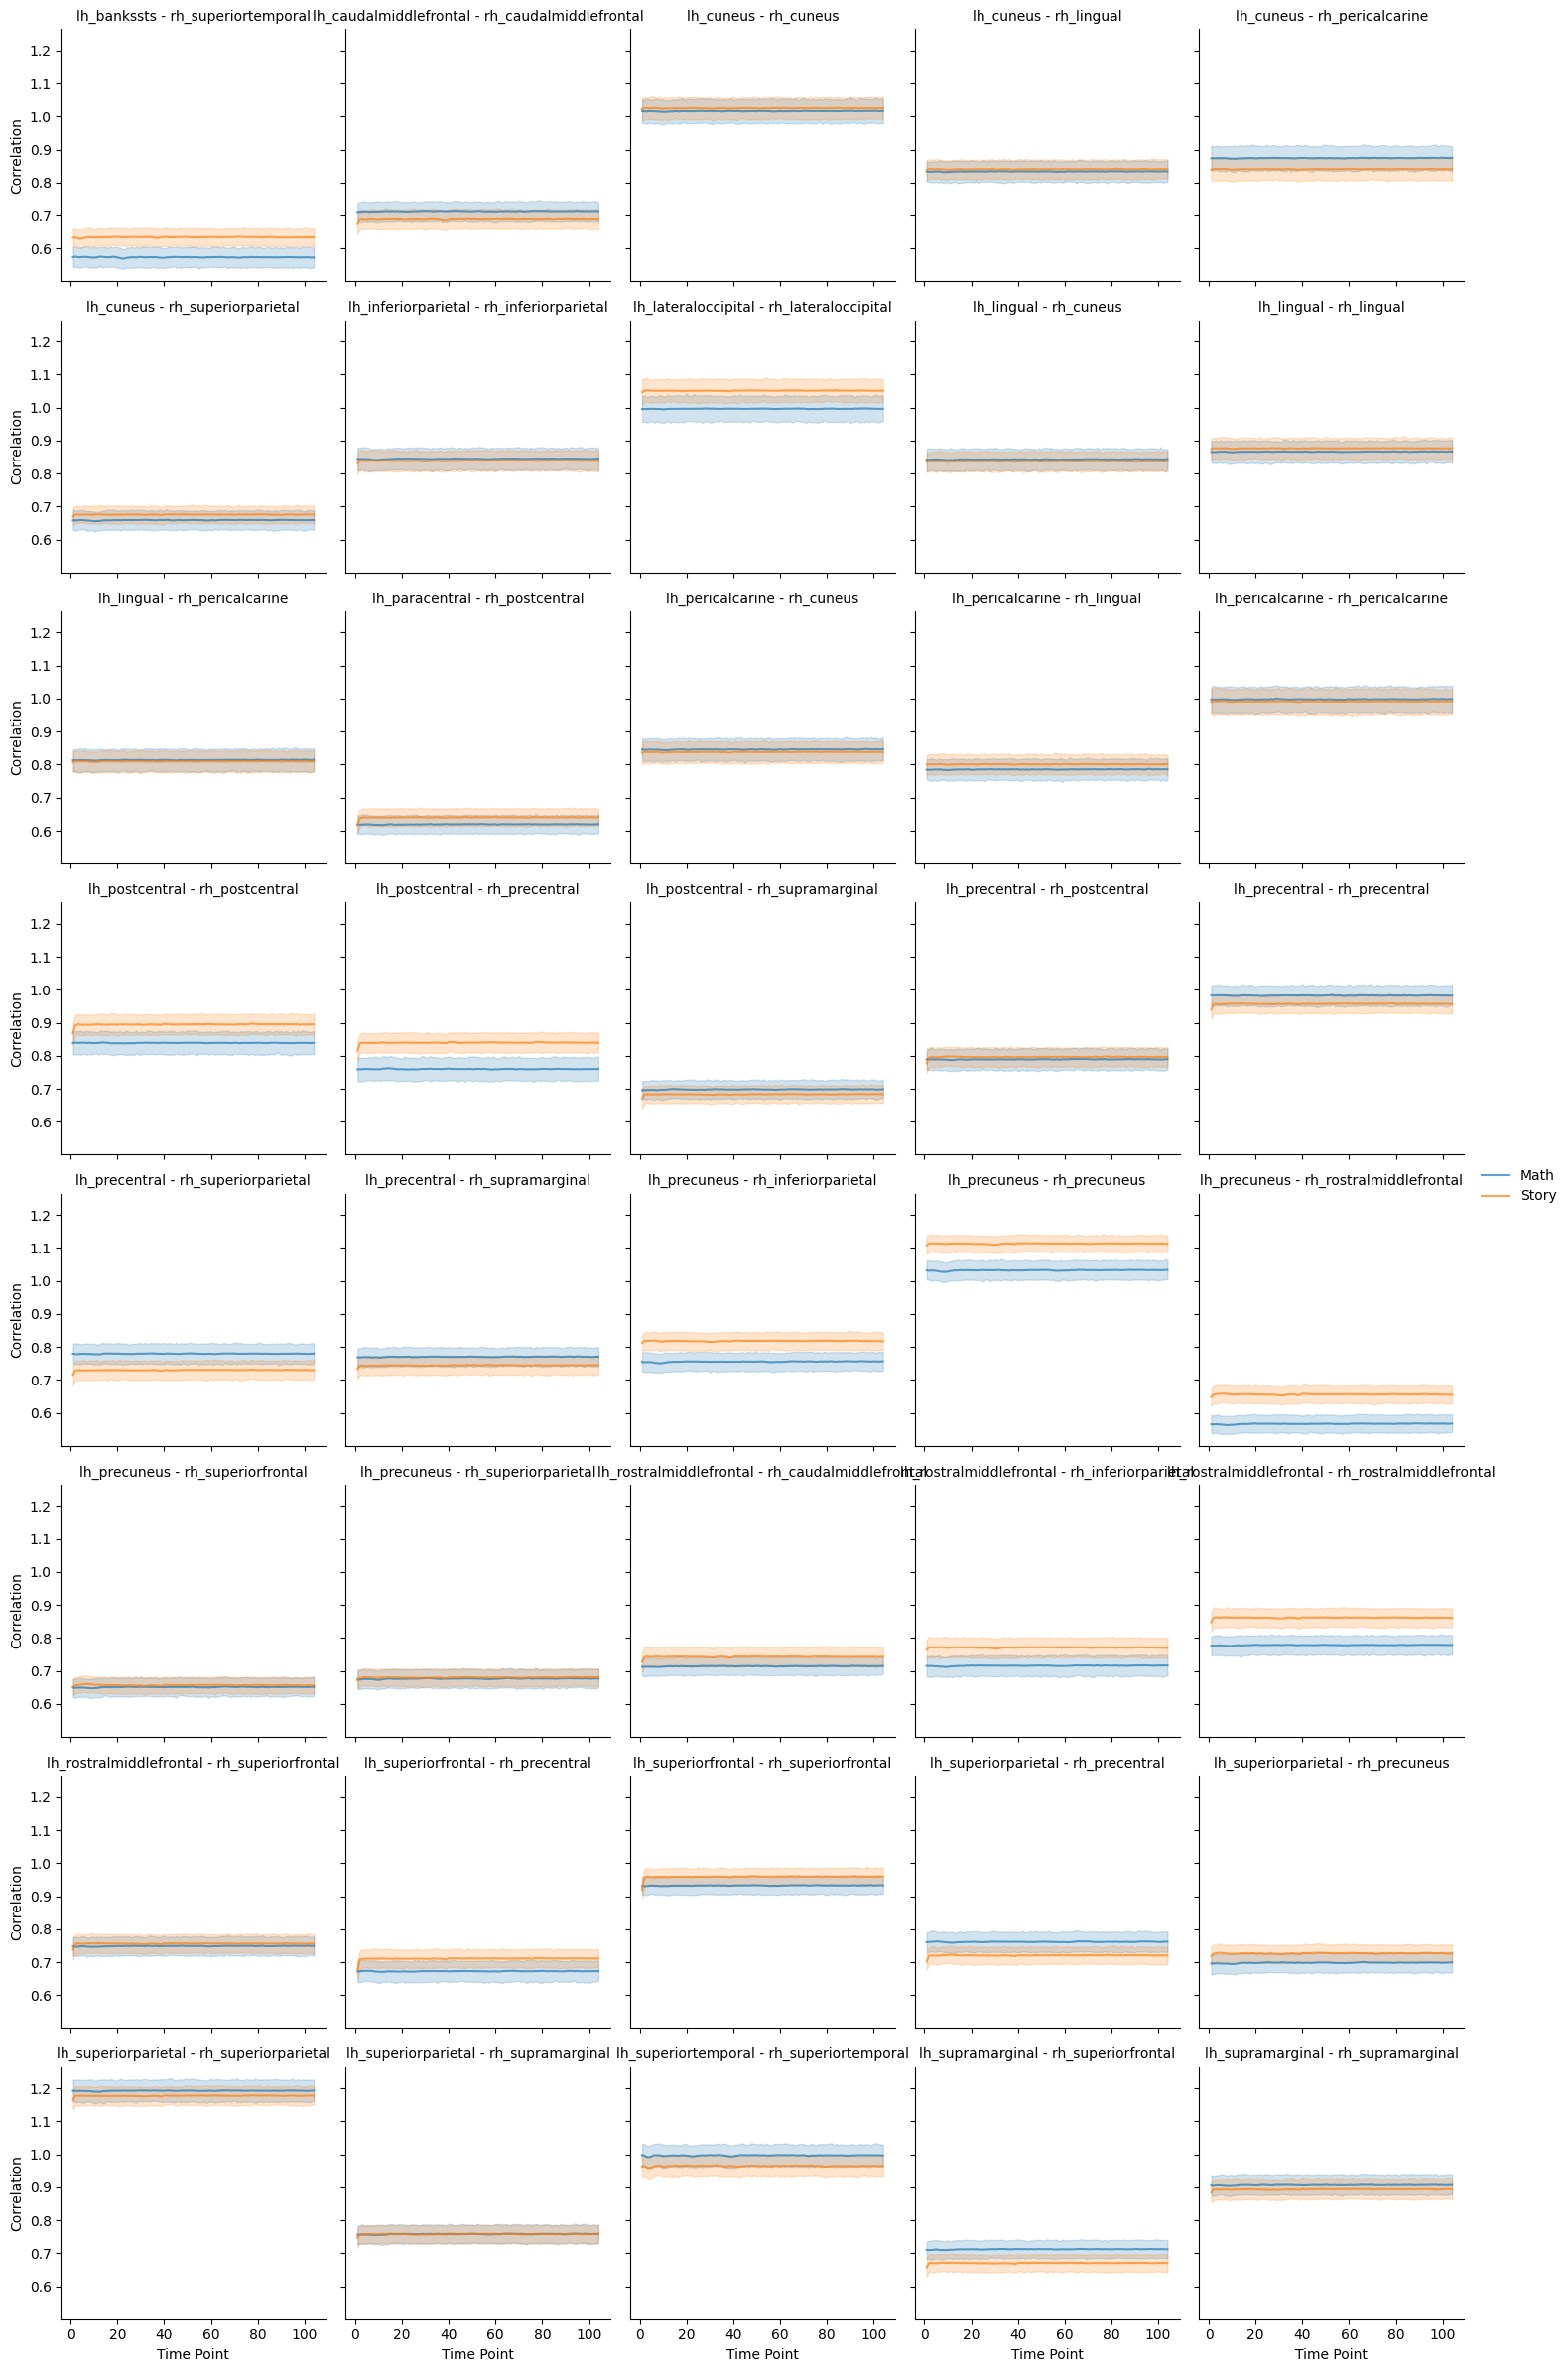

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory containing subject Excel files
directory = "C:/Users/thaplood2/Documents/Story_Math_analysis/common/"  # Replace with actual path

# Initialize an empty DataFrame to collect data from all subjects
all_data = pd.DataFrame()

# Process each subject's file
for file_name in os.listdir(directory):
    if file_name.endswith(".xlsx"):  # Process only Excel files
        file_path = os.path.join(directory, file_name)
        xls = pd.ExcelFile(file_path)

        # Read relevant sheets
        lh_math = pd.read_excel(xls, sheet_name='inter_fc_math', header=None)
        lh_story = pd.read_excel(xls, sheet_name='inter_fc_story', header=None)
        lh_conn = pd.read_excel(xls, sheet_name='inter_conn', header=None)

        # Extract edge names (excluding header)
        edges = lh_conn.iloc[1:, 0].astype(str) + " - " + lh_conn.iloc[1:, 1].astype(str)  # Combine columns A & B

        # Extract time points (first row of data sheets)
        time_points = lh_math.iloc[0, :].values  # Use first row as time points

        # Convert data into long format for visualization
        def reshape_data(df, condition):
            df_data = df.iloc[1:].copy()  # Exclude first row (time points)
            df_data.columns = time_points  # Assign time points as column names
            df_data['Edge'] = edges.values  # Assign edge names
            df_long = df_data.melt(id_vars=['Edge'], var_name='Time Point', value_name='Correlation')
            df_long['Condition'] = condition
            df_long['Subject'] = file_name  # Add subject identifier
            return df_long

        math_data = reshape_data(lh_math, 'Math')
        story_data = reshape_data(lh_story, 'Story')

        # Append data for all subjects
        all_data = pd.concat([all_data, math_data, story_data], ignore_index=True)

# Convert Time Point column to numeric for proper plotting
all_data['Time Point'] = pd.to_numeric(all_data['Time Point'])

### OPTION 1: Single Line Plot for All Edges ###
plt.figure(figsize=(20, 10))
sns.lineplot(data=all_data, x='Time Point', y='Correlation', hue='Edge', 
             style='Condition', palette='tab10', alpha=0.5)

plt.xlabel("Time Point", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.title("Functional Connectivity Changes Over Time (All Edges)", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title="Edge", fontsize=14, title_fontsize=16, loc='upper left', bbox_to_anchor=(1.05, 1))  # Place legend outside the plot
plt.show()


### OPTION 2: Facet Grid - One Small Plot Per Edge ###
g = sns.FacetGrid(all_data, col="Edge", col_wrap=5, height=3, sharey=True)
g.map_dataframe(sns.lineplot, x="Time Point", y="Correlation", hue="Condition", alpha=0.7)
g.set_axis_labels("Time Point", "Correlation")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()
